In [1]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

### 1.散点图

假设通过爬虫你获取到了长沙2019年4,10月份每天白天的最高气温(分别位于列表a,b),那么此时如何寻找出气温和随时间变化的某种规律

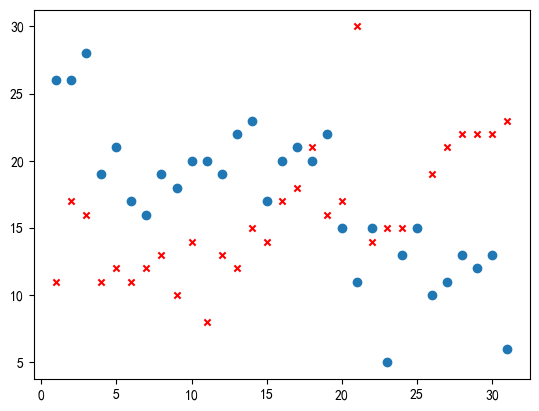

In [14]:
# x,y 数据集->> 描述数据所在位置
# s->>点的尺寸
# c->>点的颜色
# marker->>标记点
# plt.scatter

# 1.构建x,y
# 4月份的气温
y_4 = [11,17,16,11,12,11,12,13,10,14,8,13,12,15,14,17,18,21,16,17,30,14,15,15,15,19,21,22,22,22,23]
# 10月份的气温
y_10 = [26,26,28,19,21,17,16,19,18,20,20,19,22,23,17,20,21,20,22,15,11,15,5,13,15,10,11,13,12,13,6]
# 假设4月与10月共享x
x_ = list(range(1,32))

# 2.可视化
plt.scatter(x_,y_4,color='r',s=20,marker='x')
plt.scatter(x_,y_10)
plt.show()

# 注意：缺陷，看不出趋势，当数据更复杂时，会混乱
# 解决：4月与10月都在x轴，但是分开显示

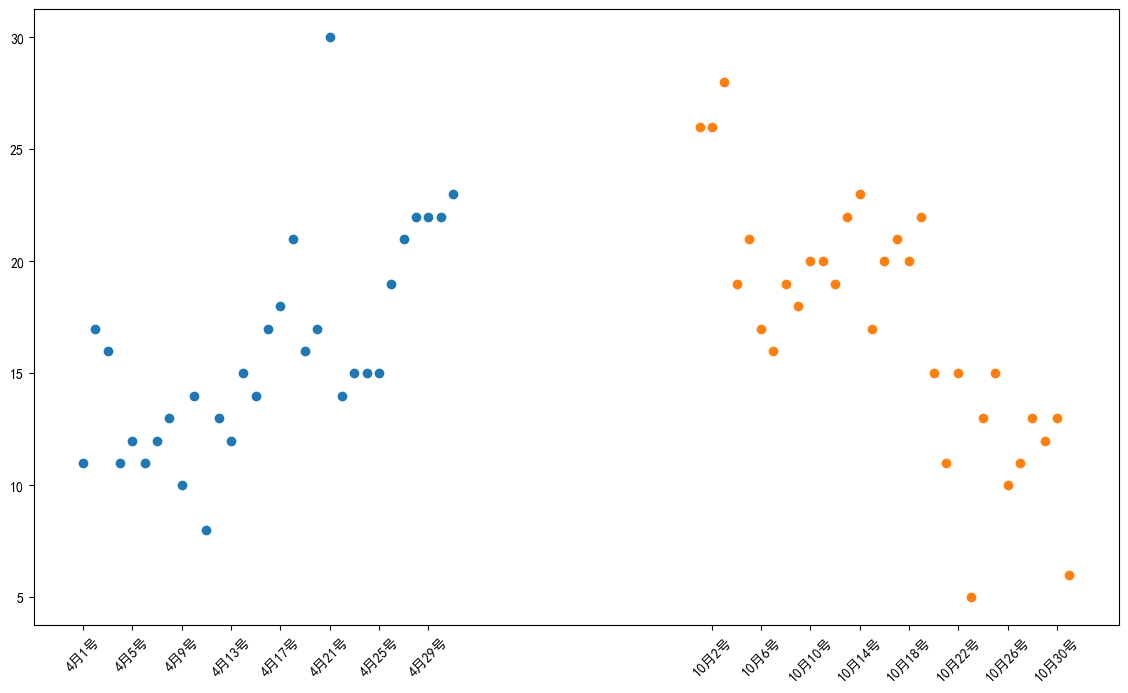

In [26]:
# 1.构建x,y
# 4月份的气温
y_4 = [11,17,16,11,12,11,12,13,10,14,8,13,12,15,14,17,18,21,16,17,30,14,15,15,15,19,21,22,22,22,23]
# 10月份的气温
y_10 = [26,26,28,19,21,17,16,19,18,20,20,19,22,23,17,20,21,20,22,15,11,15,5,13,15,10,11,13,12,13,6]

x_4 = list(range(1,32))
x_10 = list(range(51,82))

# 设置画布
plt.figure(figsize=(14,8))

#绘图
plt.scatter(x_4,y_4)
plt.scatter(x_10,y_10)

# 设置x轴的刻度显示：四月1号..四月31号   十月1号..十月31号
#刻度标签
x_l = [f"4月{i}号" for i in x_4]
x_l += [f"10月{i-50}号" for i in x_10]
x_l

#刻度
x_t = x_4+x_10

plt.xticks(x_t[::4],x_l[::4],rotation=45)
plt.show()

### 2.条形图

#### 2.1柱状图

假设你获取到了2019年内地电影票房前20的电影(列表a)和电影票房数据(列表b),那么如何更加直观的展示该数据 

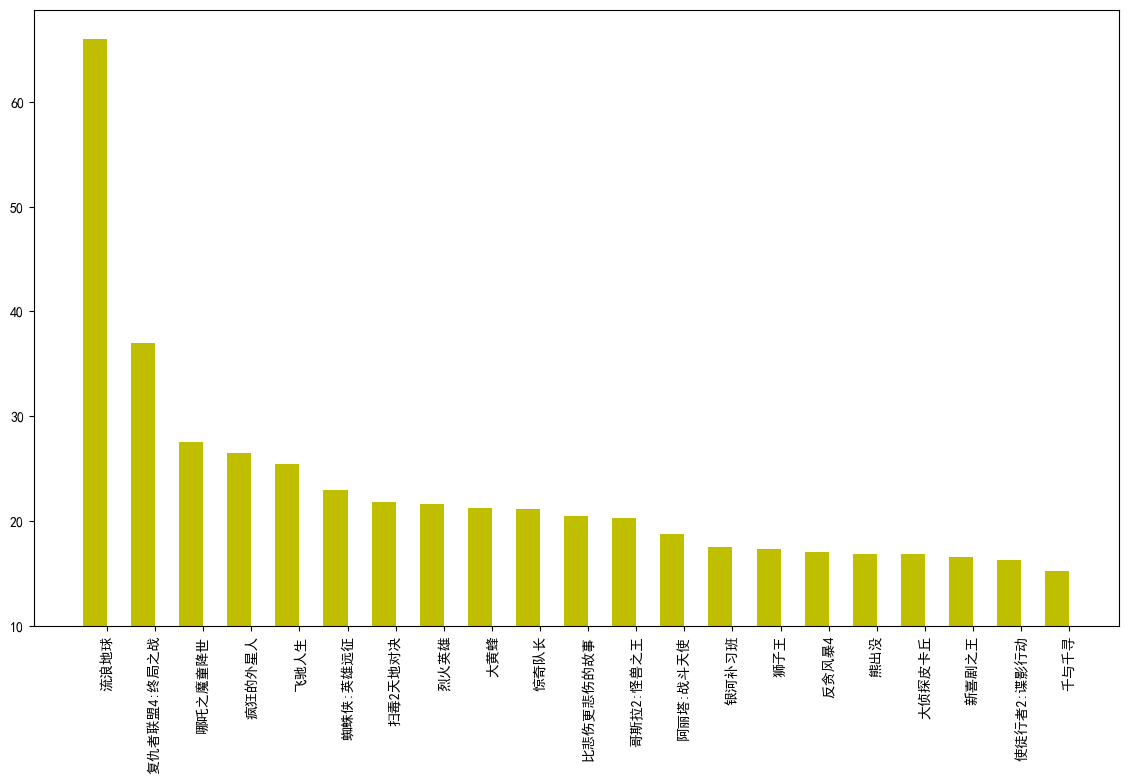

In [34]:
# 条形图
# x->>x轴坐标点/坐标标签
# height->>y轴的坐标点
# width->>柱子的宽度,默认为0.8
# bottom->>y轴的基线，默认是0，也就是距离底部的距离为0
# align->>对齐方式,注意：默认是center,居中显示。但是当设置为edge，则靠边对齐.
#     - 当width>0时，设置为edge，往右边边缘对齐
#     - 当width<0时，设置为edge，往左边边缘对齐
# plt.bar

# 1.构建数据
movie_x = ["流浪地球","复仇者联盟4:终局之战","哪吒之魔童降世","疯狂的外星人","飞驰人生","蜘蛛侠:英雄远征","扫毒2天地对决","烈火英雄","大黄蜂","惊奇队长","比悲伤更悲伤的故事","哥斯拉2:怪兽之王","阿丽塔:战斗天使","银河补习班","狮子王","反贪风暴4","熊出没","大侦探皮卡丘","新喜剧之王","使徒行者2:谍影行动","千与千寻"]  
movie_height = [56.01,26.94,17.53,16.49,15.45,12.96,11.8,11.61,11.28,11.12,10.49,10.3,8.75,7.55,7.32,6.99,6.88,6.86,6.58,6.23,5.22]

# 4.设置画布大小
plt.figure(figsize=(14,8))

# 2.绘制条形图
plt.bar(movie_x,movie_height,width=-0.5,bottom=10,align="edge",color='y')

# 5.让刻度旋转
x_t = list(range(len(movie_x)))
x_l = movie_x
plt.xticks(x_t,x_l,rotation=90)

# 3.展示图形
plt.show()

#### 2.2分组条形图

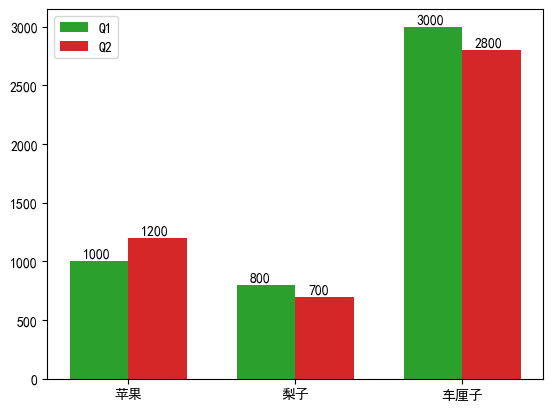

In [55]:
# 分组条形图 ->> 没有提供分组条形图直接的接口
# 1.构建数据
x = ["苹果", "梨子", "车厘子"]
y_q1 = [1000, 800, 3000]
y_q2 = [1200, 700, 2800]

# 2.可视化，注意：直接绘制2个bar，会覆盖掉
# plt.bar(x,y_q1)
# plt.bar(x,y_q2)

# 思路1：修改width
plt.bar(x,y_q1,width=-0.35,align="edge")
plt.bar(x,y_q2,width=0.35,align="edge")

# 思路2：
# 将x设置为0,1,2下标位置
x_p = list(range(len(x)))

# 设置宽度
width = 0.35

# 蓝色的在刻度中央的左边，让黄色的在刻度中央的右边
# 位置左移width/2  位置-width/2 ->> 怎么让[0,1,2]里面每一个刻度都往左移动width/2？
po_l = [i-width/2 for i in x_p]
po_r = [i+width/2 for i in x_p]

plt.bar(po_l,y_q1,width=width,label="Q1")
plt.bar(po_r,y_q2,width=width,label="Q2")

# 4.设置图例
plt.legend(loc="upper left")

# 5.设置刻度标签
plt.xticks(x_p,x)

# 6.设置注释(拓展)，0.1和30可以自己设置，随便改，只要效果好看就行
for x,y in list(zip(po_l,y_q1)):
    plt.annotate(f"{y}",xy = (x,y),xytext=(x-0.1,y+30))
for x,y in list(zip(po_r,y_q2)):
    plt.annotate(f"{y}",xy = (x,y),xytext=(x-0.1,y+30))

# 3.展示图形
plt.show()

#### 2.3堆叠条形图

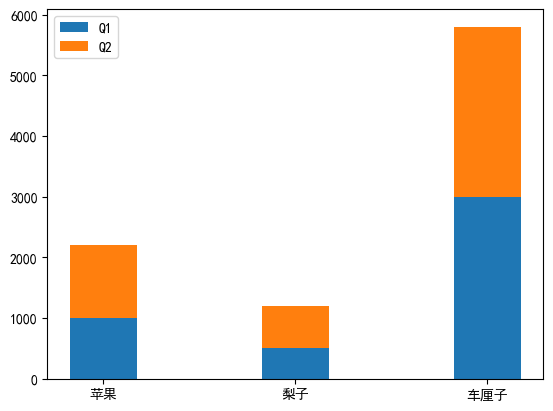

In [58]:
# 堆叠条形图
x = ["苹果", "梨子", "车厘子"]
y_q1 = [1000, 500, 3000]
y_q2 = [1200, 700, 2800]
plt.bar(x,y_q1,width=0.35,label="Q1")
plt.bar(x,y_q2,width=0.35,bottom=y_q1,label="Q2")
plt.legend()
plt.show()

#### 2.4水平条形图

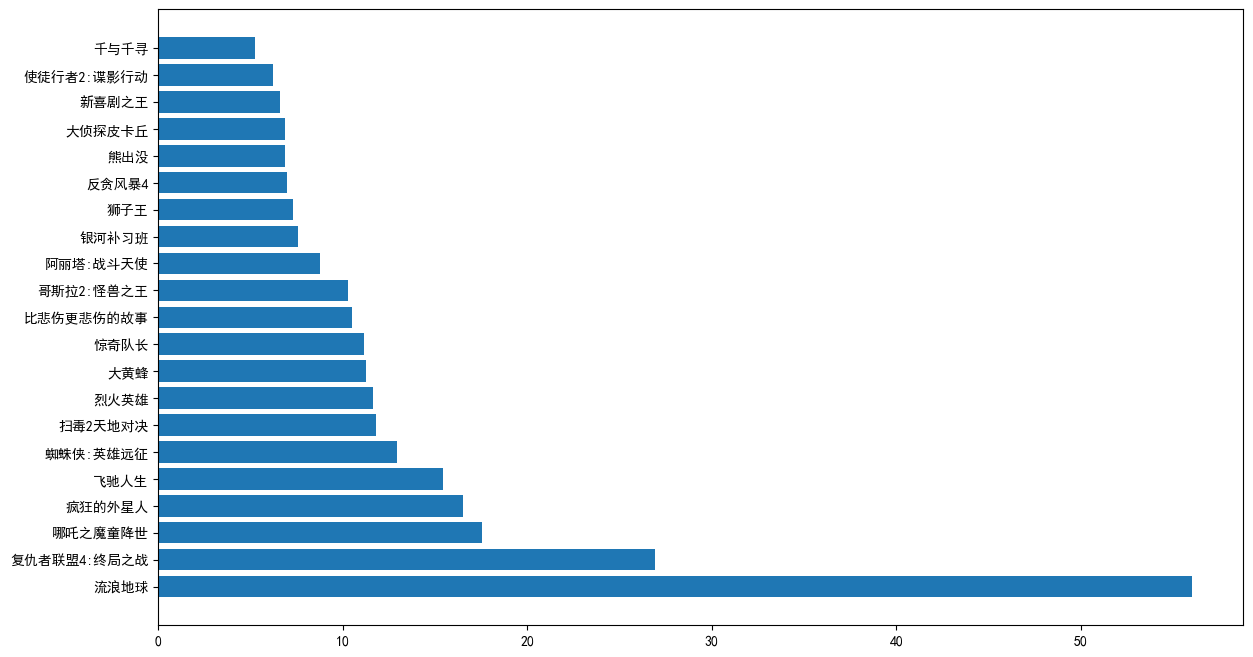

In [62]:
# 水平条形图
# 1.构建数据
movie_y = ["流浪地球","复仇者联盟4:终局之战","哪吒之魔童降世","疯狂的外星人","飞驰人生","蜘蛛侠:英雄远征","扫毒2天地对决","烈火英雄","大黄蜂","惊奇队长","比悲伤更悲伤的故事","哥斯拉2:怪兽之王","阿丽塔:战斗天使","银河补习班","狮子王","反贪风暴4","熊出没","大侦探皮卡丘","新喜剧之王","使徒行者2:谍影行动","千与千寻"]  
movie_width = [56.01,26.94,17.53,16.49,15.45,12.96,11.8,11.61,11.28,11.12,10.49,10.3,8.75,7.55,7.32,6.99,6.88,6.86,6.58,6.23,5.22]

# 4.设置画布大小
plt.figure(figsize=(14,8))

# 2.绘制条形图
plt.barh(movie_y,movie_width)

# 3.展示图形
plt.show()

### 总结：
本次使用的函数
- plt.bar(x,height,width=,bottom=,align="",color="",label="")
- plt.legend(loc="upper left") loc可以不写,需要结合label属性使用
- plt.barh()